## EAS 503 Homework 2 Submission
Name - Freya Genesis D Mello

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw2.ipynb**


### Submission Details 
* **Due Date** - October 16, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Inheritance and Encapsulation (15 points)

Consider a class of credit card accounts. A credit card account can have 2 types of credit cards:
1. Primary card  
2. Supplement card (Sup-card)

Consider the following attributes of the cards:

- A primary account is the main account to which multiple sup-cards are linked. 

- The primary credit card holder will be responsible for the bill payments for all the transactions on the primary card itself as well as all its supplimentary cards. 

- There are two types of credit limits:

    1. Individual card limit (limiting the expenditure per card)

    2. Account limit (limiting the total expenditure on primiary and the related sup-cards)

Account Limit >= Individual Card Limit

- There are two types of expenditure (or balances):

    1. Individual card expenditure (different for each card irrepsective of primary or otherwise)

    2. Account expenditure (total spending on primary and all the related sup-cards)

$$Account expenditure = \Sigma(Individual card expenditure )$$ 


- Each sup-card has the same individual credit limit as the primary credit card. 

- Any transaction over the permitted limits must be denied i.e. if the a transaction leaves the total account expenditure exceeds the `account limit`, such transaction, on any of the cards linked to the account (primary or sup-card), will be denied. Also, for any sup-card that has expenditure over the individual card limit, further transactions must be blocked.  

For this problem, design a class `PrimaryCard` with all the account details and primary credit card details included in the class. Construct a sub-class of supplementary card holder, `SupplementaryCard`, linked to a primary credit card account. Ensure that the sensitive details of all the accounts (credit card numbers, balance, account limit etc.) must saved and accessed securely. 

Use the `Account_details.txt` file to access the account details for 15 credit cards. The transaction details for the month of october are provided in `transaction.txt` file. Design an algorithm to update the account balance on all the accounts and plot the final account balance on each day for the month of october.

In [3]:
class PrimaryCard:
    #Initializing function
    def __init__(self, cust_id, card_no, account_num, card_lim, Current_Balance_within_card, exp):
        self.__cust_id = cust_id #Customer ID
        self.__card_no = card_no #Credit Card Number
        self.__account_num = account_num #Account Number
        self.__card_lim = card_lim #Individual Card Limit
        self.__Current_Balance_within_card = Current_Balance_within_card #Current Balance Within Card
        self.__acc_lim = card_lim # Will be set in set_acc_lim() #Account Limit
        self.__acc_exp = exp #Account Expenditure
        
    #Setters
    def set_acc_lim(self, value):
        self.__acc_lim = value
    def set_acc_expenditure(self, customer, acc_no, expenditure):
        current_acc_expenditure = customer[acc_no][0].__acc_exp
        for cards in customer[acc_no]:
            cards.__acc_exp = cards.__acc_exp + expenditure
        self.__acc_exp = self.__acc_exp + current_acc_expenditure
        self.__acc_exp = self.__acc_exp - expenditure
    
    #Getters
    def get_cust_id(self):
        return self.__cust_id
    def get_card_no(self):
        return self.__card_no
    def get_acc_no(self):
        return self.__account_num
    def get_card_lim(self):
        return self.__card_lim
    def get_Current_Balance_within_card(self):
        return self.__Current_Balance_within_card
    def get_acc_lim(self):
        return self.__acc_lim
    def get_acc_expenditure(self):
        return self.__acc_exp
    
    #Updates
    def update_acc_expenditure(self, amt):
        self.__acc_exp = self.__acc_exp + amt
    def update_card_balance(self, amt):
        self.__Current_Balance_within_card = self.__Current_Balance_within_card + amt
        
    #Validate Expenditure  - balance !> card limit OR balance !> account limit
    def validate_expenditure(self, amt):    
        if self.__acc_exp + amt > self.__acc_lim:
            return False
        if self.__Current_Balance_within_card + amt > self.__card_lim:
            return False
        return True
        
class SupplementaryCard(PrimaryCard):
    def dummy_func(self):
        return -1
        
   
        
        

In [17]:
import csv
import matplotlib.pyplot as plt

customers = {}
with open('./Account_details.txt', 'r') as f:
    # Skip the first line of headings
    next(f)
    for row in f:
        line = row.split("\t")
            
        # If its a Primary Card    
        if (line[3] == 'P'):
            # If account number is already added to the dictionary then append the Primary card object
            if line[2] in customers.keys():
                customers[line[2]].append(PrimaryCard(line[0], line[1], line[2], int(line[4]), int(line[5]), int(line[5])))
                # Calculating account expenditure
                customers[line[2]][-1].set_acc_expenditure(customers, line[2], int(line[5]))
            else:
                customers[line[2]] = [PrimaryCard(line[0], line[1], line[2], int(line[4]), int(line[5]), 
                                                  int(line[5]))]
        # If its a Supplementary Card 
        elif (line[3] == 'S'):
            # If account number is already added to the dictionary then append the Supplementary card object
            if line[2] in customers.keys():
                customers[line[2]].append(SupplementaryCard(line[0], line[1], line[2], int(line[4]), 
                                                            int(line[5]), int(line[5])))
                # Calculating account expenditure
                customers[line[2]][-1].set_acc_expenditure(customers, line[2], int(line[5]))
            else:
                customers[line[2]] = [SupplementaryCard(line[0], line[1], line[2], int(line[4]), int(line[5]), int(line[5]))]

#Getting Account limit
acc_lim = {}
for c in customers.keys():
    acc_lim[c] = 0
    for cards in customers[c]:
        # Setting max of of individual card limits as the account limit
        if acc_lim[cards.get_acc_no()] < cards.get_card_lim():
            acc_lim[cards.get_acc_no()] = int(cards.get_card_lim())
        else:
            acc_lim[cards.get_acc_no()] = int(cards.get_card_lim())
            
#Setting the Account Limit as max of of individual card limits
for c in customers.keys():
    for cards in customers[c]:
        cards.set_acc_lim(acc_lim[c])

with open('./transaction.txt', 'r') as f:
    next(f)
    cust_trans_amounts = {}
    for row in f:
        line = row.split("\t")
        
        # Get the customer ID
        if line[0].isdigit():
            cust_id = line[0]
            
        # Get transaction amount
        if line[1]:
            trans_amt = float(line[1])
            
        # Get the day of the month
        if line[2][4].isdigit():
            day = int(line[2][3] + line[2][4])
        elif line[2][3].isdigit():
            day = int(line[2][3])
        
        # Getting account number and list of cards for the Customer ID
        for c in customers:
            for cards in customers[c]:
                if cust_id == cards.get_cust_id():
                    acc_no = cards.get_acc_no()
                    cards_considered = cards
        
        # Validating if the credit card is maxed out or not
        if (cards_considered.validate_expenditure(trans_amt)):
            # Credit card can be swiped
            cards_considered.update_acc_expenditure(trans_amt)
        
            if acc_no not in cust_trans_amounts:
                cust_trans_amounts[acc_no] = {day:cards_considered.get_acc_expenditure()}
            else:
                cust_trans_amounts[acc_no][day] = cards_considered.get_acc_expenditure()
                
        else:
            # Balance > card limit OR Balance > account limit
            print("Insufficient funds in account number %s of Customer ID %s"%(acc_no, 
                                                                               cards_considered.get_cust_id()))
            continue


    


Insufficient funds in account number 4952 of Customer ID 15
Insufficient funds in account number 4952 of Customer ID 14
Insufficient funds in account number 4952 of Customer ID 15
Insufficient funds in account number 4952 of Customer ID 15
Insufficient funds in account number 4952 of Customer ID 13
Insufficient funds in account number 4952 of Customer ID 14
Insufficient funds in account number 4952 of Customer ID 15
Insufficient funds in account number 4952 of Customer ID 14
Insufficient funds in account number 4952 of Customer ID 13
Insufficient funds in account number 4952 of Customer ID 13
Insufficient funds in account number 4952 of Customer ID 13
Insufficient funds in account number 4952 of Customer ID 13


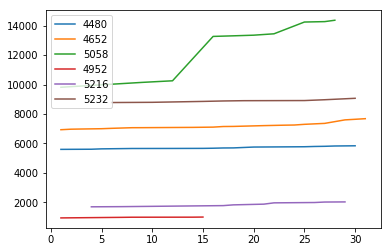

In [16]:
# Individual lists for plotting
accounts = []
dates = []
transaction_amounts = []

for account_no, date_and_transAmt in cust_trans_amounts.items():
    accounts.append(account_no)
    dates.append(sorted(date_and_transAmt.keys()))
    transaction_amounts.append(sorted(date_and_transAmt.values()))

# Plotting
for i in range(0, len(accounts)):
    plt.plot((dates[i]), transaction_amounts[i], label = accounts[i])
    
plt.legend(loc='best')
plt.show()

### Problem 2 - Polynomials (15 Points)

Consider a general form of an nth order polynomial. You are asked to implement a polynomial of arbitrary degree using classes in python. For instance consider the polynomial:
$$7x^4 + 2x^2 + 5 = 0$$

For this implements the following steps:
1. Implement a class that represents a single term. 
2. Implement a class for the entire polynomial. 
3. Implement an operator ($*$) to multiply two single terms, a term and a polynomial, and two polynomials. (__Note__: _you can overload the $*$ operator in Python by defining a method called ``__mul__(self,other):`` and make it mutiply the ``self`` object with the ``other`` object)
4. Implement an operator(s) that enables addition of a term and a polynomial and/or two polynomials. (__Note__: _you can overload the  $+$  operator in Python by defining a method called ``__add__(self,other)``: and make it add the self object with the other object)
5. Implement the following two internal methods within ``Polynomial`` class:
    - ``order()``, which returns the order of the polynomial (as an ``int``).
    - ``solve()``, which returns solutions for the polynomial (a ``list`` of roots). Only do it for quadratic polynomials, and raise an exception for higher order polynomials.
6. Implement an external function that plots the polynomial on a domain of [-10,10] (you will have to use _matplotlib_ rountines for this).
7. Include a destructor function for the polynomial class.

Use the above class definitions and operators to generate the solutions (wherever needed) for the following set of polynomials:

1. $x^5 -3x^3 +9x^2+5x+6=0$
2. $x^3 -8x +5=0$
3. $x^2+9x+7=0$
3. Consider the following three polynomials: $f(x)=3x-1,$ $g(x)=x^2-2$ and $p(x)=8x^2 +4$. Plot the function $f(x)-g(x)*p(x)=0$ by taking $f,g,p$ as input functions. For this, use the ``__mul__(self,other)`` and ``__add__(self,other)`` methods.

Note: Here you are basically asked to define the basis for the vector space of real polynomials and define all the vector operations.

In [8]:
import math
import cmath
import numpy as npa
import matplotlib.pyplot as plt


class Term:
    def __init__(self, term):
        # Call the function to split each term into coef-exp
        self.split_to_array(term)
        
    def split_to_array(self, term):
        term.split()
        # If term's coefficient is negative
        if (term[0] == '-'):
            self.coef = -1*int(term[1])
            self.exp = int(term[5])
        else:
            # If the term is of 2 digits
            if(term[1].isdigit()):
                self.coef = int(term[0] + term[1])
                self.exp = int(term[5])
            else:
                self.coef = int(term[0])
                self.exp = int(term[4])
        # Return the coefficient-exponent pair
        return (self)
        
    def print_value(self):
        # Taking the coefficient and exponent values and printing it in a "A*x^B" format
        res = []
        res.append(str(self.coef))
        if(self.exp != 0):
            res.append('x^')
            res.append(str(self.exp))
        return res
    
class Polynomial:
    # Initialize
    def __init__(self, terms):
        # Handling negative terms
        terms = terms.replace('-', '+-')
        # Get individual terms
        self.indi_terms = terms.split('+')
        # Getting rid of null values
        if(self.indi_terms[0] == ''):
                del self.indi_terms[0]
        # Resultant polynomial list of all the coefficients and exponents
        self.res = []
     
    # Overloading * operator
    def __mul__(self, other):
        terms_coefs = []
        terms_exps = []
        
        for i in range(0, len(self.indi_terms)):
            term_i = Term(self.indi_terms[i])
            for j in range(0, len(other.indi_terms)):
                term_j = Term(other.indi_terms[j])
                terms_coefs.append(term_i.coef*term_j.coef)
                terms_exps.append(term_i.exp+term_j.exp)
        
        for x, y in zip(terms_coefs, terms_exps):
            self.res.append([x, y])
            
        pos = []
        
        # Adding terms of same exponent values
        for i in range(0, len(self.res)-1):
            for j in range(i+1, len(self.res)):
                if (self.res[i][1] == self.res[j][1]):
                    self.res[i][0] = self.res[i][0] + self.res[j][0]
                    # Taking positions of the terms to be deleted after addition
                    pos.append(j)
        
        # Delete from last
        pos.reverse()
        pos_unique = []
        
        for x in pos: 
            if x not in pos_unique: 
                # Getting unique positions
                pos_unique.append(x) 
                
        for j in range(0, len(pos_unique)):
            del self.res[pos_unique[j]]
        
        return self.print_value()
        
    # Overloading + operator   
    def __add__(self, other):
        terms_coefs = []
        terms_exps = []
        self.res = []
        
        #Adding terms of same exponent values
        for i in range(0, len(other.indi_terms)):
            term_i = Term(other.indi_terms[i])
            for j in range(0, len(self.indi_terms)):
                term_j = Term(self.indi_terms[j])
                if (term_i.exp == term_j.exp):
                    terms_coefs.append(term_i.coef + term_j.coef)
                    terms_exps.append(term_i.exp)
                
        #Adding terms of different coefficient values
        for f in range(0, len(other.indi_terms)):
            term_jj = Term(other.indi_terms[f])
            if(term_jj.exp not in terms_exps):
                terms_coefs.append(term_jj.coef)
                terms_exps.append(term_jj.exp)
    
        #Adding terms of different coefficient values
        for i in range(0, len(self.indi_terms)):
            term_ii = Term(self.indi_terms[i])
            if(term_ii.exp not in terms_exps):
                terms_coefs.append(term_ii.coef)
                terms_exps.append(term_ii.exp)
                
        for x, y in zip(terms_coefs, terms_exps):
            self.res.append([x, y])
        return self.print_value()
        
    def solve(self):
        terms_coefs = []
        terms_exps = []
        
        for i in range(0, len(self.indi_terms)):
            term_i = Term(self.indi_terms[i])
            # Getting terms and exponents
            terms_coefs.append(term_i.coef)
            terms_exps.append(term_i.exp)
        
        for x, y in zip(terms_coefs, terms_exps):
            self.res.append([x, y])
            
        if(self.order() == 2):
            #Its a quadratic equation
            a = 0 
            b = 0
            c = 0
            
            # a = coefficient of the term of exponent value 2
            a = [self.res[i][0] for i in range(len(self.res)) if self.res[i][1] == 2]
            # b = coefficient of the term of exponent value 1
            b = [self.res[i][0] for i in range(len(self.res)) if self.res[i][1] == 1]
            # c = coefficient of the term of exponent value 0
            c = [self.res[i][0] for i in range(len(self.res)) if self.res[i][1] == 0]
            
            #discriminant
            d = (b[0]**2) - (4*a[0]*c[0])
            
            # find two solutions
            if(d < 0):
                root1 = (-b[0]-cmath.sqrt(d))/(2*a[0])
                root2 = (-b[0]+cmath.sqrt(d))/(2*a[0])
            else:
                root1 = (-b[0]-math.sqrt(d))/(2*a[0])
                root2 = (-b[0]+math.sqrt(d))/(2*a[0])
            
            return(root1, root2)
        else:
            raise Exception("Not a valid polynomial for determining roots")
            pass
        
    def order(self):
        terms_exps = []
        
        for i in range(0, len(self.indi_terms)):
            term_i = Term(self.indi_terms[i])
            terms_exps.append(term_i.exp)
        
        return max(terms_exps)
    
    def print_value(self):
        final = []
        final_res = []
            
        for i in range(0, len(self.res)):
            res = []
            s = ""
            res.append(str(self.res[i][0]))
            res.append('*x^')
            res.append(str(self.res[i][1]))
            final.append(s.join(res))
            
        for i in range(0, len(final)):
            s = " + "
            final_res.append(s.join(final))
            
        print(final_res[0])
        return final_res[0]
    
    # Destructor
    def __del__(self):
        print(self)


In [9]:
def plotting(poly):
    x = npa.linspace(-10, 10, 100)
    y = []
    y_val = 0
    
    # Individual polynomial terms
    terms = poly.indi_terms
    
    # Getting rid of null terms
    for i in range(0, len(terms)):
        if(terms[i] == ''):
                del terms[i]
                break
                
    #All x values
    for k in range(0, len(x)): 
        y_val = 0
        
        #All individual terms in the polynomial
        for i in range(0, len(terms)): 
            if(terms[i][0] == '-'):
                coef = -1 * int(terms[i][1])
                exp = int(terms[i][5])
            else:
                if(terms[i][1].isdigit()):
                    coef = int(terms[i][0] + terms[i][1])
                    exp = int(terms[i][5])
                else:
                    coef = int(terms[i][0])
                    exp = int(terms[i][4])
                    
            # Individual values of each term        
            val = coef * (x[k] ** exp)
            
            # Adding it up to y value
            y_val = y_val + val
            
        # Y value    
        y.append(y_val)
        
    # PLOT   
    plt.plot(x, y)
    plt.show()


In [10]:
p1 = Polynomial('1*x^5-3*x^3+9*x^2+5*x^1+6*x^0')
p1.solve()

Exception: Not a valid polynomial for determining roots

In [11]:
p2 = Polynomial('1*x^3-8*x^1+5*x^0')
p2.solve()

Exception: Not a valid polynomial for determining roots

In [12]:
p3 = Polynomial('1*x^2+9*x^1+7*x^0')
p3.solve()

(-8.140054944640259, -0.859945055359741)

Negative of g(x)
-1*x^2 + 2*x^0
(-1)*g(x) * p(x)
-8*x^4 + 12*x^2 + 8*x^0
Final Answer
7*x^0 + -8*x^4 + 12*x^2 + 3*x^1


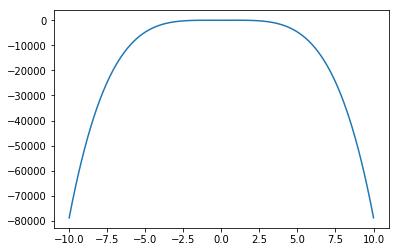

In [13]:

#Defining f(x) as given in question
f_of_x = Polynomial('3*x^1-1*x^0')
#Minus
minus = Polynomial('-1*x^0')
#Defining f(x) as given in question
g_of_x = Polynomial('1*x^2-2*x^0')
#Defining f(x) as given in question
p_of_x = Polynomial('8*x^2+4*x^0')

 
print("Negative of g(x)")
Prod_poly_one = minus * g_of_x

Prod_poly_two = Polynomial(Prod_poly_one.replace(" ",""))

print("(-1)*g(x) * p(x)")
Prod_poly_three = Prod_poly_two * p_of_x

Prod_poly_four = Polynomial(Prod_poly_three.replace(" ",""))

print("Final Answer")
Final_poly = f_of_x + Prod_poly_four

Final_poly_res = Polynomial(Final_poly.replace(" ",""))

plotting(Final_poly_res)

### Problem 3 - Random Walk (10 Points)

Imagine you are standing at (0,0) on the real plane. At every time step, assume you either take a step of random length, say `c`, in one of the four directions (right, left, up, down) with equal probability. This means that after one time step, your new location can be (c,0), (-c,0), (0,c) or (0,-c) with equal probability.

For this, create a class `Walker`. The class needs to store the following information:
- current position of the walker, where the position is a 2-tuple. You can initialize it to (0,0)
- path taken so far by the walker (initially this list will only contain the current position)
- method called ``getDirection()`` that determines the direction for the next step (one out of four possible directions: right, left, up, down). To determine the direction, sample a random value from the set {1,2,3,4} using `np.random.randint(0,N)` and assign each outcome to a unit step movement in a particular direction.
- method called ``getLength()`` that determines the length for the next step (one out of six possible lengths: 0,1,2,3,4,5). To determine the length, sample a random value from the set {1,2,3,4,5,6} using `np.random.randint(0,N)` and assign each outcome to a step length.
- method called ``walk()`` which changes the current position of the walker in a specifed direction. Make sure to update the path field to incorporate the next position.

After implementing the `Walker` class, you need to conduct the following experiment.
Suppose you want to figure out, how many steps will it take for the walker to go outside a pre-defined perimeter (centered at (0,0)). You will have simulate a random walk and keep checking the current position to figure that out. 

Write a code to run the following simulation:
Starting from (0,0), have your walker randomly walk around (using the defined ``walk()`` method), until it steps out of a rectangular area with vertices as: (-10,-10), (-20,20), (20,20), (20,-20). Count the number of steps taken before the walker leaves the area. Repeat the simulation 5 times and report the average number of steps taken by the walker before it exits the area.

Plot the path taken in each of the 5 simulation runs (you should all five walks in one graph using different colors).

In [14]:
import numpy as np
import operator
import matplotlib.pyplot as plt

class Walker:
    def __init__(self, cur_pos, path):
        self.cur_pos = cur_pos
        self.path = [cur_pos]
        
    def getDirection(self):
        #N belongs to any value in {1,2,3,4}
        direc = np.random.randint(1,5)
        return direc
    
    def getLength(self):
        length = np.random.randint(1,7)
        return length
    
    def walk(self):
        cur_dir = self.getDirection()
        cur_len = self.getLength()
        
        if (cur_dir == 1): #North +Y axis
            self.cur_pos = tuple(map(operator.add, self.cur_pos, (0, cur_len)))
        elif (cur_dir == 2): #West -X axis
            self.cur_pos = tuple(map(operator.add, self.cur_pos, (-1*cur_len, 0)))
        elif (cur_dir == 3): #South -Y axis 
            self.cur_pos = tuple(map(operator.add, self.cur_pos, (0, -1*cur_len)))
        else: #cur_dir == 4 #East +X axis
            self.cur_pos = tuple(map(operator.add, self.cur_pos, (cur_len, 0)))
        
        self.path.append(self.cur_pos)
        



Average Steps  158.800000


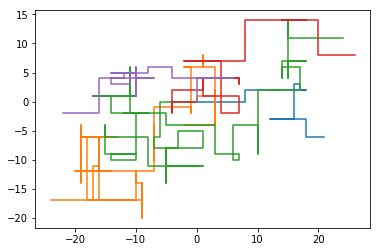

In [18]:
w = Walker((0,0), 0)
lens = 0
for i in range(0, 5):
    w = Walker((0,0), 0)
    while(1):
        w.walk()
        if(w.cur_pos[0] > 20 or w.cur_pos[0] < -20 or w.cur_pos[1] > 20 or w.cur_pos[1] < -20):
            break
        lens = lens + w.getLength()
    plt.plot(*zip(*w.path))
    
print("Average Steps  %f"%(lens/5))
plt.show()

### Problem 4 - Inverse Transform Sampling (10 Points)

Random sample for any distribution can be generated from a random sample from uniform distribution. This can be done using **Inverse transform Sampling**. For example, suppose you want to create a sample of size $n$ from a _Kumaraswamy distribution_. To obtain this sample:
1. Generate a sample of size $n$ from Uniform[0,1].
2. Identify the inverse of the CDF function of the distribution of your choice (this needs to be done manually and implemented). In our example, it is Kumaraswamy distribution. Call this function ``inverseCDFKumaraswamy()``. Note that you are not allowed to use any routines from ``np.random`` package here. This function should take two arguments, first is the sample point, and the second is the distribution parameter value, $\lambda$.
3. Apply the ``inverseCDFKumaraswamy()`` function on each of the $n$ sample points that you generated in step 1. The $n$ outputs will be the sample from your desired distribution. 

The Probability Density Function (PDF) of the Kumaraswamy distribution is
$$f(x)=\alpha*\beta*x^{\alpha-1}*(1-x^\alpha)^{\beta-1}$$

The Cumulative Distribution Function (CDF) of the Kumaraswamy distribution is
$$F(x)= 1-(1-x^\alpha)^\beta$$

Using the above implementation, generate a sample of size 100 from a Kumaraswamy ($\alpha=2$, $\beta=5$) distribution.

Your output must include the mean, variance and distribution plot (a histogram) for the generated sample. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#inverse cdf of Kumaraswamy distribution
def inverseCDFKumaraswamy(val, alpha, beta):
    inverseCDF = (1-((1-val)**(1/beta)))**(1/alpha)
    return inverseCDF



Mean of Kumaraswamy Distribution 0.379262
Variance of Kumaraswamy Distribution 0.029381


Text(0,0.5,'Frequency')

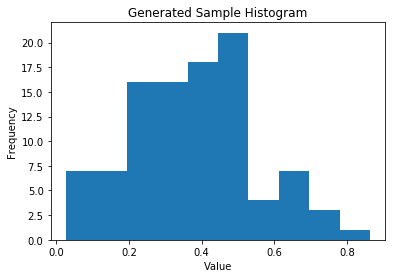

In [21]:
# setting n = 100
n = 100
sums = 0
generated_sample_list = []

# Sample values for n = 100
generated_sample = np.random.uniform(0,1,n)

for i in generated_sample:
    # Inverse CDF values
    generated_sample_list.append(inverseCDFKumaraswamy(i, 2, 5))
    
# Mean
mean_Kumaraswamy = sum(generated_sample_list)/len(generated_sample_list)

# Variance
variance_Kumaraswamy = sum((i - mean_Kumaraswamy)**2 for i in generated_sample_list)/len(generated_sample_list)

print("Mean of Kumaraswamy Distribution %f"%mean_Kumaraswamy)
print("Variance of Kumaraswamy Distribution %f"%variance_Kumaraswamy)

#Plotting Histogram
plt.hist(generated_sample_list)
plt.title("Generated Sample Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")